### SVM Classsifier

In [25]:
import chardet
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import scipy
import seaborn as sns
import sys
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from scipy import stats

#### Load Data

In [26]:
data = pd.read_csv('processed_data/combined.csv')
data.head()

,subject_id,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,gender,age,diagnosis,adhd_binary
0,sub-0010011,4813.7,785.8,9892.7,45860.8,6487.5,3429.7,5657.9,1606.1,705.3,...,11197.0,1626.0,2100.0,875.0,5565.0,992979.0,1.0,9.16,ADHD,NaN
1,sub-6568351,5304.9,418.0,12851.3,60354.1,6557.8,3832.1,5498.3,1498.4,763.9,...,11809.0,2032.0,1890.0,1030.0,5512.0,1062350.0,1.0,8.10,Control,NaN
2,sub-0010029,9169.5,632.3,13238.4,55460.8,6471.6,4523.3,6335.9,1977.4,1161.6,...,11704.0,1919.0,1871.0,1277.0,5830.0,1126028.0,1.0,13.09,ADHD,NaN
3,sub-0010027,5143.7,632.3,11137.3,47115.4,6769.7,4062.3,5733.6,1574.8,524.0,...,12703.0,1407.0,1873.0,1251.0,6944.0,1061340.0,0.0,8.28,ADHD,NaN
4,sub-7333005,4499.2,681.2,15137.2,63323.7,8509.2,4692.6,6204.7,2005.6,931.3,...,12888.0,1465.0,2506.0,1233.0,8837.0,1221867.0,0.0,9.00,ADHD,NaN


In [27]:
# Update adhd_binary column based on diagnosis
data['adhd_binary'] = data['diagnosis'].apply(lambda x: 1 if x == 'ADHD' else 0)
data.head()

,subject_id,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,gender,age,diagnosis,adhd_binary
0,sub-0010011,4813.7,785.8,9892.7,45860.8,6487.5,3429.7,5657.9,1606.1,705.3,...,11197.0,1626.0,2100.0,875.0,5565.0,992979.0,1.0,9.16,ADHD,1
1,sub-6568351,5304.9,418.0,12851.3,60354.1,6557.8,3832.1,5498.3,1498.4,763.9,...,11809.0,2032.0,1890.0,1030.0,5512.0,1062350.0,1.0,8.10,Control,0
2,sub-0010029,9169.5,632.3,13238.4,55460.8,6471.6,4523.3,6335.9,1977.4,1161.6,...,11704.0,1919.0,1871.0,1277.0,5830.0,1126028.0,1.0,13.09,ADHD,1
3,sub-0010027,5143.7,632.3,11137.3,47115.4,6769.7,4062.3,5733.6,1574.8,524.0,...,12703.0,1407.0,1873.0,1251.0,6944.0,1061340.0,0.0,8.28,ADHD,1
4,sub-7333005,4499.2,681.2,15137.2,63323.7,8509.2,4692.6,6204.7,2005.6,931.3,...,12888.0,1465.0,2506.0,1233.0,8837.0,1221867.0,0.0,9.00,ADHD,1


In [28]:
# First, let's check which columns have NaN values
print("NaN count in each column:")
nan_counts = data.isna().sum()
print(nan_counts)

NaN count in each column:
subject_id                      0
Left-Lateral-Ventricle          0
Left-Inf-Lat-Vent               0
Left-Cerebellum-White-Matter    0
Left-Cerebellum-Cortex          0
                               ..
rh_insula_volume                0
gender                          0
age                             0
diagnosis                       0
adhd_binary                     0
Length: 285, dtype: int64


In [29]:
# Identify columns with NaN values
columns_with_nans = nan_counts[nan_counts > 0].index.tolist()
print(f"\nColumns containing NaN values: {columns_with_nans}")


Columns containing NaN values: ['eTIV']


In [30]:
fields_to_drop = ['subject_id', 'gender', 'age', 'diagnosis'] + columns_with_nans
clean_data = data.drop(columns = fields_to_drop)
features = ['rh_entorhinal_thickness', 'lh_precuneus_thickness', 'rh_middletemporal_thickness', 'lhSurfaceHoles', 'lh_precuneus_volume', 'lh_bankssts_thickness', 'lh_transversetemporal_thickness', 'Left-Thalamus', 'rh_frontalpole_thickness', 'rh_temporalpole_area']
X = clean_data[features]
y = clean_data['adhd_binary']

In [31]:
X.head()

,rh_entorhinal_thickness,lh_precuneus_thickness,rh_middletemporal_thickness,lhSurfaceHoles,lh_precuneus_volume,lh_bankssts_thickness,lh_transversetemporal_thickness,Left-Thalamus,rh_frontalpole_thickness,rh_temporalpole_area
0,2.545,2.566,2.233,45.0,2136.0,2.348,2.755,6487.5,3.379,339.0
1,2.599,2.506,2.082,43.0,1780.0,2.433,2.946,6557.8,3.065,407.0
2,2.852,2.362,2.569,28.0,1408.0,2.229,2.562,6471.6,2.881,425.0
3,2.730,2.609,2.244,77.0,1579.0,2.193,2.546,6769.7,2.619,457.0
4,2.822,2.849,2.973,22.0,3282.0,2.973,3.123,8509.2,3.189,358.0


In [32]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: adhd_binary, dtype: int64

In [33]:
# Print out original dataset size
print(f"\nTotal number of samples: {len(clean_data)}")
print(f"Number of ADHD samples (class 1): {sum(y == 1)}")
print(f"Number of control samples (class 0): {sum(y == 0)}")


Total number of samples: 224
Number of ADHD samples (class 1): 108
Number of control samples (class 0): 116


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [35]:
# Print training and testing set sizes
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Training set class distribution: ADHD: {sum(y_train == 1)}, Control: {sum(y_train == 0)}")
print(f"Testing set class distribution: ADHD: {sum(y_test == 1)}, Control: {sum(y_test == 0)}")


Training set size: 112 samples
Testing set size: 112 samples
Training set class distribution: ADHD: 54, Control: 58
Testing set class distribution: ADHD: 54, Control: 58


In [36]:
X_train.head()

,rh_entorhinal_thickness,lh_precuneus_thickness,rh_middletemporal_thickness,lhSurfaceHoles,lh_precuneus_volume,lh_bankssts_thickness,lh_transversetemporal_thickness,Left-Thalamus,rh_frontalpole_thickness,rh_temporalpole_area
49,2.942,3.248,2.943,15.0,3422.0,2.606,3.129,8490.4,3.757,397.0
205,2.808,2.159,2.123,57.0,2476.0,2.255,2.522,7878.6,2.751,483.0
84,2.691,2.721,2.824,51.0,1592.0,2.452,2.541,5231.2,3.218,296.0
134,2.935,2.915,2.749,14.0,3080.0,2.481,2.934,7178.1,3.724,425.0
196,2.559,2.596,2.625,10.0,3601.0,2.362,3.005,9840.8,3.657,406.0


In [37]:
X_test.head()

,rh_entorhinal_thickness,lh_precuneus_thickness,rh_middletemporal_thickness,lhSurfaceHoles,lh_precuneus_volume,lh_bankssts_thickness,lh_transversetemporal_thickness,Left-Thalamus,rh_frontalpole_thickness,rh_temporalpole_area
4,2.822,2.849,2.973,22.0,3282.0,2.973,3.123,8509.2,3.189,358.0
210,2.453,2.153,2.169,91.0,2139.0,2.184,2.361,7124.3,2.509,394.0
16,2.730,2.173,2.560,62.0,2216.0,2.339,2.749,7929.2,3.347,396.0
178,2.693,2.344,2.058,63.0,2540.0,2.280,2.629,7021.3,3.390,382.0
2,2.852,2.362,2.569,28.0,1408.0,2.229,2.562,6471.6,2.881,425.0


In [38]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Create Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Maximum depth of trees (None means unlimited)
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',  # Number of features to consider for best split
    bootstrap=True,     # Whether to use bootstrap samples
    random_state=42,
    class_weight='balanced'  # Adjusts weights for imbalanced datasets
)

In [40]:
# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation accuracy scores: [0.60869565 0.65217391 0.54545455 0.68181818 0.72727273]
Mean CV accuracy: 0.6431 ± 0.0623


In [41]:
# Train the model on the full training set
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [42]:
# Make predictions on test set
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC curve

In [43]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Performance Metrics:
Accuracy: 0.6964
Precision: 0.6562
Recall: 0.7778
F1 Score: 0.7119
AUC: 0.7882


In [44]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[36 22]
 [12 42]]


In [45]:
# Get detailed metrics for each class
print("\nDetailed metrics for each class:")
print(f"True Positives: {cm[1][1]}")
print(f"False Positives: {cm[0][1]}")
print(f"True Negatives: {cm[0][0]}")
print(f"False Negatives: {cm[1][0]}")


Detailed metrics for each class:
True Positives: 42
False Positives: 22
True Negatives: 36
False Negatives: 12


In [46]:
# Print sensitivity and specificity
sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
specificity = cm[0][0] / (cm[0][0] + cm[0][1])
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")


Sensitivity (True Positive Rate): 0.7778
Specificity (True Negative Rate): 0.6207


In [47]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        58
           1       0.66      0.78      0.71        54

    accuracy                           0.70       112
   macro avg       0.70      0.70      0.70       112
weighted avg       0.70      0.70      0.69       112



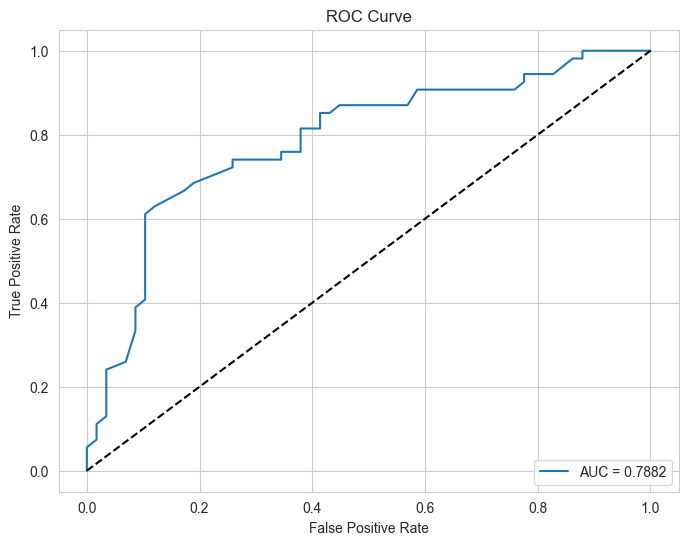

In [48]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()